In [1]:
#importing libraries and Fifa19 dataset as .csv type
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data.csv')
data

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

In [2]:
#We can drop some of the columns that may not useful for our measurements. 
dropped_cols = ['Unnamed: 0','ID','Photo','Nationality','Jersey Number','Flag','Club Logo','Real Face','Body Type']
data_updated = data.drop(dropped_cols,axis=1)

data_updated.head()

Name  Age  Overall  Potential                 Club    Value  \
0           L. Messi   31       94         94         FC Barcelona  €110.5M   
1  Cristiano Ronaldo   33       94         94             Juventus     €77M   
2          Neymar Jr   26       92         93  Paris Saint-Germain  €118.5M   
3             De Gea   27       91         93    Manchester United     €72M   
4       K. De Bruyne   27       91         92      Manchester City    €102M   

    Wage  Special Preferred Foot  International Reputation  ...  Composure  \
0  €565K     2202           Left                       5.0  ...       96.0   
1  €405K     2228          Right                       5.0  ...       95.0   
2  €290K     2143          Right                       5.0  ...       94.0   
3  €260K     1471          Right                       4.0  ...       68.0   
4  €355K     2281          Right                       4.0  ...       88.0   

   Marking StandingTackle SlidingTackle GKDiving GKHandling GKKicking  \
0     33.0           28.0          26.0      6.0       11.0      15.0   
1     28.0           31.0          23.0      7.0       11.0      15.0   
2     27.0           24.0          33.0      9.0        9.0      15.0   
3     15.0           21.0          13.0     90.0       85.0      87.0   
4     68.0           58.0          51.0     15.0       13.0       5.0   

  GKPositioning GKReflexes Release Clause  
0          14.0        8.0        €226.5M  
1          14.0       11.0        €127.1M  
2          15.0       11.0        €228.1M  
3          88.0       94.0        €138.6M  
4          10.0       13.0        €196.4M  

[5 rows x 80 columns]

In [3]:
#Assigning all columns to variable and then preview object.
stats_columns = data_updated.columns
stats_columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype

In [4]:
#Drop all rows of players which has missing position information.
data_na_pos_removed = data_updated.dropna(subset = ['Position'])

print("Rows in dataframe before removing missing position information:",len(data_updated))
print("Rows in dataframe after dropping rows with missing position information:",len(data_na_pos_removed))

Rows in dataframe before removing missing position information: 18207
Rows in dataframe after dropping rows with missing position information: 18147


In [5]:
#Defined a function to check for missing information in any column.
def check_na_vals(dataframe):
    return dataframe[dataframe.isna().any(axis = 1)]
def check_notna_vals(dataframe):
    return dataframe[dataframe.notna().any(axis = 1)]

rows_with_na = check_na_vals(data_na_pos_removed)

In [6]:
#Also dropped Joined and Loaned columns.
data_cols_removed = data_na_pos_removed.drop(['Joined','Loaned From'], axis = 1)
#Checking for missing information in other columns.
rows_with_na = check_na_vals(data_cols_removed)
#We can see first 5 rows of dataframe containing NaN values.
rows_with_na.head()

Name  Age  Overall  Potential               Club   Value   Wage  \
3          De Gea   27       91         93  Manchester United    €72M  €260K   
9        J. Oblak   25       90         93    Atlético Madrid    €68M   €94K   
18  M. ter Stegen   26       89         92       FC Barcelona    €58M  €240K   
19    T. Courtois   26       89         90        Real Madrid  €53.5M  €240K   
22       M. Neuer   32       89         89  FC Bayern München    €38M  €130K   

    Special Preferred Foot  International Reputation  ...  Composure  Marking  \
3      1471          Right                       4.0  ...       68.0     15.0   
9      1331          Right                       3.0  ...       70.0     27.0   
18     1328          Right                       3.0  ...       69.0     25.0   
19     1311           Left                       4.0  ...       66.0     20.0   
22     1473          Right                       5.0  ...       70.0     17.0   

   StandingTackle SlidingTackle GKDiving GKHandling GKKicking GKPositioning  \
3            21.0          13.0     90.0       85.0      87.0          88.0   
9            12.0          18.0     86.0       92.0      78.0          88.0   
18           13.0          10.0     87.0       85.0      88.0          85.0   
19           18.0          16.0     85.0       91.0      72.0          86.0   
22           10.0          11.0     90.0       86.0      91.0          87.0   

   GKReflexes Release Clause  
3        94.0        €138.6M  
9        89.0        €144.5M  
18       90.0        €123.3M  
19       88.0        €113.7M  
22       87.0         €62.7M  

[5 rows x 78 columns]

In [7]:
#Removing rating-by-position columns.
remove_cols = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

data_positions_removed = data_cols_removed.drop(columns = remove_cols)
#Checking for missing information in other columns.
rows_with_na = check_na_vals(data_positions_removed)
#We can see first 5 rows of dataframe containing NaN values.
rows_with_na.head()

Name  Age  Overall  Potential  \
28       J. Rodríguez   26       88         89   
38         G. Higuaín   30       88         88   
91           Paulinho   29       85         85   
166  Anderson Talisca   24       83         90   
176        M. Kovačić   24       83         89   

                               Club   Value   Wage  Special Preferred Foot  \
28                FC Bayern München  €69.5M  €315K     2171           Left   
38                            Milan    €57M  €245K     1965          Right   
91   Guangzhou Evergrande Taobao FC    €37M  €235K     2245          Right   
166  Guangzhou Evergrande Taobao FC  €36.5M   €18K     2142           Left   
176                         Chelsea    €35M  €165K     2115          Right   

     International Reputation  ...  Composure  Marking StandingTackle  \
28                        4.0  ...       87.0     52.0           41.0   
38                        4.0  ...       86.0     35.0           22.0   
91                        3.0  ...       80.0     75.0           81.0   
166                       2.0  ...       74.0     55.0           62.0   
176                       3.0  ...       72.0     69.0           75.0   

    SlidingTackle GKDiving GKHandling GKKicking  GKPositioning  GKReflexes  \
28           44.0     15.0       15.0      15.0            5.0        14.0   
38           18.0      5.0       12.0       7.0            5.0        10.0   
91           73.0     16.0       16.0      11.0            6.0         8.0   
166          42.0     13.0       11.0      13.0           12.0        10.0   
176          63.0      9.0        5.0       6.0            7.0         7.0   

     Release Clause  
28              NaN  
38              NaN  
91              NaN  
166             NaN  
176             NaN  

[5 rows x 52 columns]

In [8]:
#Import nan
from numpy import nan
#Filling NaN values in Release Clause column with mean of no..
rows_without_na = check_notna_vals(data_positions_removed)
rows_without_na['Release Clause']
rows_without_na['Release Clause'] = rows_without_na['Release Clause'].replace({'€':'', '.1K':'100', '.2K':'200', '.3K':'300', '.4K':'400', '.5K':'500', '.6K':'600', '.7K':'700', '.8K':'800', '.9K':'900', 'K':'000', '.1M':'100000', '.2M':'200000', '.3M':'300000', '.4M':'400000', '.5M':'500000', '.6M':'600000', '.7M':'700000', '.8M':'800000', '.9M':'900000', 'M':'000000'}, regex = True).astype(float)
rows_without_na['Release Clause'].mean()
data_release_filled = data_positions_removed.fillna({"Release Clause" : rows_without_na['Release Clause'].mean()})
#Checking for missing information in other columns.
rows_with_na = check_na_vals(data_release_filled)
#We can see first 5 rows of dataframe containing NaN values.
rows_with_na.head()

Name  Age  Overall  Potential Club Value Wage  Special  \
452    L. Paredes   24       80         85  NaN    €0   €0     2122   
538  A. Granqvist   33       80         80  NaN    €0   €0     1797   
568      A. Lunev   26       79         81  NaN    €0   €0     1217   
677  I. Smolnikov   29       79         79  NaN    €0   €0     2038   
874     A. Dzyuba   29       78         78  NaN    €0   €0     1810   

    Preferred Foot  International Reputation  ...  Composure  Marking  \
452          Right                       2.0  ...       74.0     73.0   
538          Right                       2.0  ...       78.0     82.0   
568          Right                       1.0  ...       69.0     18.0   
677          Right                       2.0  ...       73.0     76.0   
874          Right                       2.0  ...       70.0     21.0   

    StandingTackle SlidingTackle GKDiving GKHandling GKKicking  GKPositioning  \
452           75.0          72.0      9.0       14.0       6.0            9.0   
538           83.0          79.0      7.0        9.0      12.0           10.0   
568           20.0          12.0     80.0       73.0      65.0           77.0   
677           76.0          80.0      7.0       12.0      10.0            8.0   
874           15.0          19.0     15.0       12.0      11.0           11.0   

     GKReflexes  Release Clause  
452        10.0     4.13007e+06  
538        15.0     4.13007e+06  
568        85.0     4.13007e+06  
677        15.0     4.13007e+06  
874         8.0     4.13007e+06  

[5 rows x 52 columns]

In [9]:
#Remove € character from Value column.
data_release_filled['Value'] = data_release_filled['Value'].str.replace('€','')
#Also remove K and M characters from Value column.
data_release_filled['Value'] = data_release_filled['Value'].replace({'.5K':'500', 'K':'000', '.5M':'500000','M':'000000'}, regex = True).map(pd.eval).astype(int)
# Removing rows with 0 in Value column.
players_with_value = data_release_filled[data_release_filled['Value'] != 0]

In [10]:
#Print number of rows in dataframe withput missing values in Value column.
print("Number of rows in dataframe with no missing values",len(players_with_value))

players_with_value.head()

Number of rows in dataframe with no missing values 17907


Name  Age  Overall  Potential                 Club      Value  \
0           L. Messi   31       94         94         FC Barcelona  110500000   
1  Cristiano Ronaldo   33       94         94             Juventus   77000000   
2          Neymar Jr   26       92         93  Paris Saint-Germain  118500000   
3             De Gea   27       91         93    Manchester United   72000000   
4       K. De Bruyne   27       91         92      Manchester City  102000000   

    Wage  Special Preferred Foot  International Reputation  ...  Composure  \
0  €565K     2202           Left                       5.0  ...       96.0   
1  €405K     2228          Right                       5.0  ...       95.0   
2  €290K     2143          Right                       5.0  ...       94.0   
3  €260K     1471          Right                       4.0  ...       68.0   
4  €355K     2281          Right                       4.0  ...       88.0   

   Marking StandingTackle SlidingTackle GKDiving GKHandling GKKicking  \
0     33.0           28.0          26.0      6.0       11.0      15.0   
1     28.0           31.0          23.0      7.0       11.0      15.0   
2     27.0           24.0          33.0      9.0        9.0      15.0   
3     15.0           21.0          13.0     90.0       85.0      87.0   
4     68.0           58.0          51.0     15.0       13.0       5.0   

   GKPositioning  GKReflexes  Release Clause  
0           14.0         8.0         €226.5M  
1           14.0        11.0         €127.1M  
2           15.0        11.0         €228.1M  
3           88.0        94.0         €138.6M  
4           10.0        13.0         €196.4M  

[5 rows x 52 columns]

In [11]:
#Print statistics.
players_with_value['Value'].describe()

count    1.790700e+04
mean     1.829636e+06
std      5.633115e+06
min      1.000000e+00
25%      4.500000e+03
50%      1.500000e+05
75%      6.500000e+05
max      1.185000e+08
Name: Value, dtype: float64

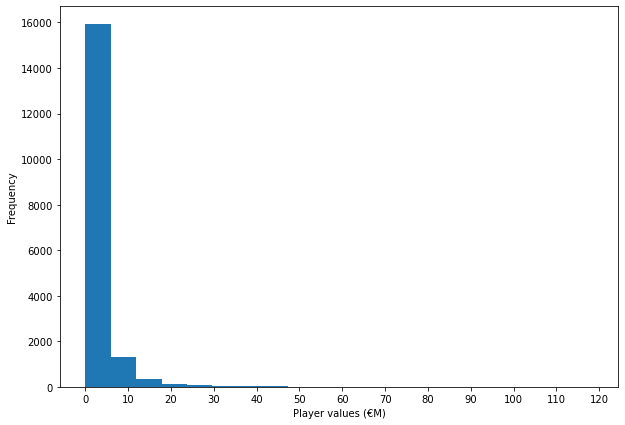

In [12]:
#Plotting frequency of player values.
fig = plt.figure(figsize = (10,7))
#Value divided by 10^6 so in the x-axis units are in millions.
(players_with_value['Value']/10**6).plot.hist(bins = 20)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(np.arange(0,125,10))
plt.xlabel('Player values (€M)')
plt.show()

In [13]:
#Assign players with values above or equal to €1K.
above_1k = players_with_value[players_with_value['Value'] >= 1000]

#Check total numbers of players in new dataframe.
print("Players with value above €1 000:" , len(above_1k))

Players with value above €1 000: 14317


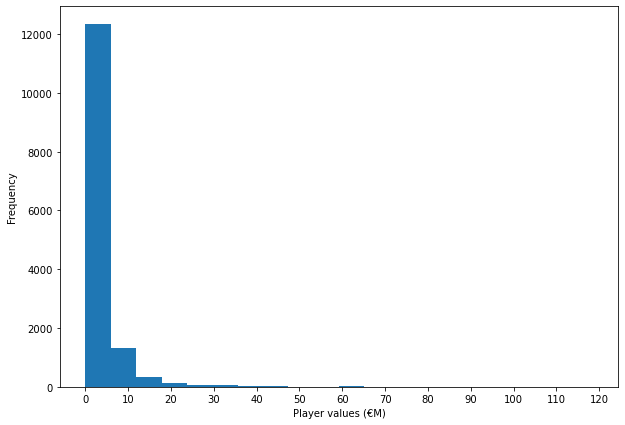

In [14]:
import seaborn as sns
#Plot frequency of player values.
fig = plt.figure(figsize = (10,7))
#Value divided by 10^6 so in the x-axis units are in millions.
(above_1k['Value']/10**6).plot.hist(bins=20)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(np.arange(0,125,10))
plt.xlabel('Player values (€M)')
plt.show()

In [15]:
#Remove € character from Wage column.
above_1k['Wage'] = above_1k['Wage'].str.replace('€','')
#Remove K character from Wage column.
above_1k['Wage'] = above_1k['Wage'].replace({'K':'000'}, regex = True).map(pd.eval).astype(int)

years = above_1k['Contract Valid Until'].str.extract('(\d{4})').copy()
above_1k['Contract Valid Until'] = years
above_1k['Contract Valid Until'] = above_1k['Contract Valid Until'].fillna(0).astype(int)
#Removing lbs in Weight column.
mass_lbs = above_1k['Weight'].str.replace('lbs','').astype(float)
above_1k['Weight'] = round(mass_lbs*0.453592,2)
#Removing €,M,K in Release Clause column and converting to float.
above_1k['Release Clause'] = above_1k['Release Clause'].str.replace('€','').str.replace('M','').str.replace('K','').astype(float)
above_1k['Release Clause'] = above_1k['Release Clause'].fillna(0)
#Converting inches and feet to cm
feet_inches = above_1k['Height'].str.split("'",expand = True).astype(int)
cm = feet_inches[0]*30.48 + feet_inches[1]/12*30.48
above_1k['Height'] = cm

above_1k.head(5)

<ipython-input-15-999281ec2e49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_1k['Wage'] = above_1k['Wage'].str.replace('€','')
<ipython-input-15-999281ec2e49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_1k['Wage'] = above_1k['Wage'].replace({'K':'000'}, regex = True).map(pd.eval).astype(int)
<ipython-input-15-999281ec2e49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Name  Age  Overall  Potential                 Club      Value  \
0           L. Messi   31       94         94         FC Barcelona  110500000   
1  Cristiano Ronaldo   33       94         94             Juventus   77000000   
2          Neymar Jr   26       92         93  Paris Saint-Germain  118500000   
3             De Gea   27       91         93    Manchester United   72000000   
4       K. De Bruyne   27       91         92      Manchester City  102000000   

     Wage  Special Preferred Foot  International Reputation  ...  Composure  \
0  565000     2202           Left                       5.0  ...       96.0   
1  405000     2228          Right                       5.0  ...       95.0   
2  290000     2143          Right                       5.0  ...       94.0   
3  260000     1471          Right                       4.0  ...       68.0   
4  355000     2281          Right                       4.0  ...       88.0   

   Marking StandingTackle SlidingTackle  GKDiving  GKHandling  GKKicking  \
0     33.0           28.0          26.0       6.0        11.0       15.0   
1     28.0           31.0          23.0       7.0        11.0       15.0   
2     27.0           24.0          33.0       9.0         9.0       15.0   
3     15.0           21.0          13.0      90.0        85.0       87.0   
4     68.0           58.0          51.0      15.0        13.0        5.0   

   GKPositioning  GKReflexes  Release Clause  
0           14.0         8.0           226.5  
1           14.0        11.0           127.1  
2           15.0        11.0           228.1  
3           88.0        94.0           138.6  
4           10.0        13.0           196.4  

[5 rows x 52 columns]

In [16]:
#Assigning numerical values to Work Rate column(Low=1,Medium=2,High=3).

work_rate_cleanup = {'Low/ Low': (1+1)/2, 'Low/ Medium': (1+2)/2,'Medium/ Low':(2+1)/2, 'Low/ High':(1+3)/2,'High/ Low':(3+1)/2, 'Medium/ Medium': (2+2)/2, 'High/ Medium': (3+2)/2, 'Medium/ High': (2+3)/2, 'High/ High': (3+3)/2}
above_1k['Work Rate'].replace(work_rate_cleanup, inplace = True)

D:\Users\windo\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
#Print number of rows in dataframe with '0' in Value column.
print("Number of rows containing null values:",above_1k.isna().any(axis = 1).sum())

Number of rows containing null values: 0


In [18]:
#Checking if there is any NaN values.
rows_with_na_updated = check_na_vals(above_1k)
rows_with_na_updated

Empty DataFrame
Columns: [Name, Age, Overall, Potential, Club, Value, Wage, Special, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Contract Valid Until, Height, Weight, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause]
Index: []

[0 rows x 52 columns]

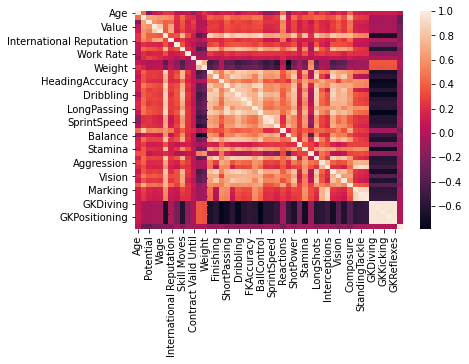

In [19]:
sns.heatmap(above_1k.corr())

In [20]:
#We have a cleaned data with Nan(Not a Number) values. 
above_1k

Name  Age  Overall  Potential                 Club  \
0                L. Messi   31       94         94         FC Barcelona   
1       Cristiano Ronaldo   33       94         94             Juventus   
2               Neymar Jr   26       92         93  Paris Saint-Germain   
3                  De Gea   27       91         93    Manchester United   
4            K. De Bruyne   27       91         92      Manchester City   
...                   ...  ...      ...        ...                  ...   
18202        J. Lundstram   19       47         65      Crewe Alexandra   
18203  N. Christoffersson   19       47         63       Trelleborgs FF   
18204           B. Worman   16       47         67     Cambridge United   
18205      D. Walker-Rice   17       47         66      Tranmere Rovers   
18206           G. Nugent   16       46         66      Tranmere Rovers   

           Value    Wage  Special Preferred Foot  International Reputation  \
0      110500000  565000     2202           Left                       5.0   
1       77000000  405000     2228          Right                       5.0   
2      118500000  290000     2143          Right                       5.0   
3       72000000  260000     1471          Right                       4.0   
4      102000000  355000     2281          Right                       4.0   
...          ...     ...      ...            ...                       ...   
18202      60000    1000     1307          Right                       1.0   
18203      60000    1000     1098          Right                       1.0   
18204      60000    1000     1189          Right                       1.0   
18205      60000    1000     1228          Right                       1.0   
18206      60000    1000     1321          Right                       1.0   

       ...  Composure  Marking  StandingTackle SlidingTackle  GKDiving  \
0      ...       96.0     33.0            28.0          26.0       6.0   
1      ...       95.0     28.0            31.0          23.0       7.0   
2      ...       94.0     27.0            24.0          33.0       9.0   
3      ...       68.0     15.0            21.0          13.0      90.0   
4      ...       88.0     68.0            58.0          51.0      15.0   
...    ...        ...      ...             ...           ...       ...   
18202  ...       45.0     40.0            48.0          47.0      10.0   
18203  ...       42.0     22.0            15.0          19.0      10.0   
18204  ...       41.0     32.0            13.0          11.0       6.0   
18205  ...       46.0     20.0            25.0          27.0      14.0   
18206  ...       43.0     40.0            43.0          50.0      10.0   

       GKHandling  GKKicking  GKPositioning  GKReflexes  Release Clause  
0            11.0       15.0           14.0         8.0           226.5  
1            11.0       15.0           14.0        11.0           127.1  
2             9.0       15.0           15.0        11.0           228.1  
3            85.0       87.0           88.0        94.0           138.6  
4            13.0        5.0           10.0        13.0           196.4  
...           ...        ...            ...         ...             ...  
18202        13.0        7.0            8.0         9.0           143.0  
18203         9.0        9.0            5.0        12.0           113.0  
18204         5.0       10.0            6.0        13.0           165.0  
18205         6.0       14.0            8.0         9.0           143.0  
18206        15.0        9.0           12.0         9.0           165.0  

[14317 rows x 52 columns]

In [21]:
attributes = list(above_1k.columns)
remove_attributes = ['Name','Age','Club','Special','Preferred Foot']
attributes = [attr for attr in attributes if attr not in remove_attributes]

#Checking datatype of every column.
above_1k[attributes].dtypes

Overall                       int64
Potential                     int64
Value                         int32
Wage                          int32
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                   float64
Position                     object
Contract Valid Until          int32
Height                      float64
Weight                      float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     float64
ShotPower                   

In [22]:
#If all values in the dataframe had the same scale, normalization would not be necessary.
#In this case, most columns are on a 0-100 scale but some are not. 
#The conversion of Work Rate and Contract Valid Until columns are not on the 0-100 scale.
#In order to use KNN accurately, the data  must be on the same scale.
#Choosing columns that will not be normalized.
non_data_cols = ['Name','Club','Position','Wage', 'Preferred Foot', 'Value']
#Forming normalized dataframe for players valued above €1K.
normalized_attributes = [attr for attr in above_1k.columns if attr not in non_data_cols]
normalized = above_1k[normalized_attributes]
#Doing the normalization.
normalized = (normalized - normalized.min()) / (normalized.max() - normalized.min())
#Adding columns that were removed before normalization back to the dataframe.
normalized = pd.concat([above_1k[non_data_cols],normalized], axis = 1)
#We can see first 5 rows of normalized dataframe .
normalized.head()

Name                 Club Position    Wage Preferred Foot  \
0           L. Messi         FC Barcelona       RF  565000           Left   
1  Cristiano Ronaldo             Juventus       ST  405000          Right   
2          Neymar Jr  Paris Saint-Germain       LW  290000          Right   
3             De Gea    Manchester United       GK  260000          Right   
4       K. De Bruyne      Manchester City      RCM  355000          Right   

       Value       Age   Overall  Potential   Special  ...  Composure  \
0  110500000  0.517241  1.000000   0.978723  0.910836  ...   1.000000   
1   77000000  0.586207  1.000000   0.978723  0.926935  ...   0.988095   
2  118500000  0.344828  0.958333   0.957447  0.874303  ...   0.976190   
3   72000000  0.379310  0.937500   0.957447  0.458204  ...   0.666667   
4  102000000  0.379310  0.937500   0.936170  0.959752  ...   0.904762   

    Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0  0.333333        0.285714       0.261364  0.056180    0.109890   0.155556   
1  0.277778        0.318681       0.227273  0.067416    0.109890   0.155556   
2  0.266667        0.241758       0.340909  0.089888    0.087912   0.155556   
3  0.133333        0.208791       0.113636  1.000000    0.923077   0.955556   
4  0.722222        0.615385       0.545455  0.157303    0.131868   0.044444   

   GKPositioning  GKReflexes  Release Clause  
0       0.146067    0.075269        0.226727  
1       0.146067    0.107527        0.127227  
2       0.157303    0.107527        0.228328  
3       0.977528    1.000000        0.138739  
4       0.101124    0.129032        0.196597  

[5 rows x 52 columns]

In [23]:
positions = normalized['Position'].unique()
positions

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [24]:
#Lists of positions in each category.
list_forwards = ['LS','ST','RS','LF','CF','RF']
list_midfielders = ['LAM','CAM','RAM','LW','RW','LM','LCM','CM','RCM','RM','LDM','CDM','RDM']
list_defenders = ['LWB','RWB','LB','LCB','RCB','RB','CB']
list_goalkeepers = ['GK']

#Creating new dataframes of players categorized according to the position.
forwards = normalized[normalized['Position'].isin(list_forwards)]
midfielders = normalized[normalized['Position'].isin(list_midfielders)]
defenders = normalized[normalized['Position'].isin(list_defenders)]
goalkeepers = normalized[normalized['Position'].isin(list_goalkeepers)] 

In [25]:
print('Number of forwards:',len(forwards))
print('Number of midfielders:',len(midfielders))
print('Number of defenders:',len(defenders))
print('Number of goalkeepers:',len(goalkeepers))

Number of forwards: 2040
Number of midfielders: 5820
Number of defenders: 4721
Number of goalkeepers: 1736


In [26]:
#Checking correlation between attribures and Value for each category.
def check_corr(category, title):
    correlation = category.corr()['Value'].sort_values()
    print("Top 11 features for " + str(title) + "(includes 'Value'):")

    print(correlation[-11:])
    print("==================================\n")
    
    #Return top 10 features.
    return correlation.index[-11:-1].to_list()
    
fwd_features = check_corr(forwards, "forwards")
mid_features = check_corr(midfielders, "midfielders")
def_features = check_corr(defenders, "defenders")
gk_features = check_corr(goalkeepers, "goalkeepers")

Top 11 features for forwards(includes 'Value'):
Dribbling                   0.548975
Positioning                 0.565494
Special                     0.578627
BallControl                 0.580926
Reactions                   0.592445
Potential                   0.593296
Finishing                   0.611143
Overall                     0.649465
International Reputation    0.693500
Wage                        0.870133
Value                       1.000000
Name: Value, dtype: float64

Top 11 features for midfielders(includes 'Value'):
Vision                      0.565077
Dribbling                   0.575717
ShortPassing                0.579646
Special                     0.583348
Reactions                   0.584837
Potential                   0.618041
BallControl                 0.635986
Overall                     0.677627
International Reputation    0.689849
Wage                        0.851176
Value                       1.000000
Name: Value, dtype: float64

Top 11 features for defenders

In [27]:
goalkeepers = goalkeepers.drop('Skill Moves', axis = 1)
goalkeepers = goalkeepers.drop('Work Rate', axis = 1)
gk_features = check_corr(goalkeepers, "goalkeepers")
gk_features

Top 11 features for goalkeepers(includes 'Value'):
GKKicking                   0.448799
Reactions                   0.462729
GKPositioning               0.504428
GKReflexes                  0.551878
GKDiving                    0.552734
GKHandling                  0.554360
Potential                   0.577832
Overall                     0.582847
International Reputation    0.662497
Wage                        0.861919
Value                       1.000000
Name: Value, dtype: float64



['GKKicking',
 'Reactions',
 'GKPositioning',
 'GKReflexes',
 'GKDiving',
 'GKHandling',
 'Potential',
 'Overall',
 'International Reputation',
 'Wage']

In [28]:
fwd_y = forwards['Value']
fwd_x = forwards.drop('Value', axis = 1)

mid_y = midfielders['Value']
mid_x = midfielders.drop('Value', axis = 1)

def_y = defenders['Value']
def_x = defenders.drop('Value', axis = 1)

gk_y = goalkeepers['Value']
gk_x = goalkeepers.drop('Value', axis = 1)

In [29]:
#Split dataset into train and test_and_validate sets for each position
#The players in each category will be split into train, test and validation datasets. 
#70% of the players will be used for training the model and 15% will be used for testing.
#The remaining 15% will then be used for validation.
from sklearn.model_selection import train_test_split
fwd_x_train, fwd_x_test, fwd_y_train, fwd_y_test = train_test_split(fwd_x, fwd_y, test_size = 0.3, random_state = 1)
mid_x_train, mid_x_test, mid_y_train, mid_y_test = train_test_split(mid_x, mid_y, test_size = 0.3, random_state = 1)
def_x_train, def_x_test, def_y_train, def_y_test = train_test_split(def_x, def_y, test_size = 0.3, random_state = 1)
gk_x_train, gk_x_test, gk_y_train, gk_y_test = train_test_split(gk_x, gk_y, test_size = 0.3, random_state = 1)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
#Defined KNN function to predict player value based on top 10 relevant attributes.
def knn_predict(x_train, y_train, x_test, y_test, features, category):
    knn = KNeighborsRegressor()
 
    #Training using set of attributes sent to function.
    knn.fit(x_train[features],y_train)
    
    #Predicting value of players in test set.
    predictions = knn.predict(x_test[features])
    
    #Checking accuracy on test data.
    accuracy = knn.score(x_test[features],y_test)
    print('The accuracy for', category, 'is:', round(accuracy*100,2), "%")
    
    #Creating new player_val dataframe containing player name, actual value and predicted value.
    data = {"Name": x_test['Name'], "Actual Value": y_test, "Predicted Value": predictions}
    player_val = pd.DataFrame(data)
    
    return player_val

fwd_prices_knn = knn_predict(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards')
mid_prices_knn = knn_predict(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders')
def_prices_knn = knn_predict(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders')
gk_prices_knn = knn_predict(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers') 

The accuracy for forwards is: 67.68 %
The accuracy for midfielders is: 77.61 %
The accuracy for defenders is: 76.68 %
The accuracy for goalkeepers is: 74.24 %


In [31]:
from sklearn.model_selection import GridSearchCV
def knn_neighbors(x_train, y_train, x_test, y_test, features, category):
    knn_n = KNeighborsRegressor()
 
    #Range all values to test for n_neighbours.
    param_grid = {'n_neighbors': np.arange(1, 25)}
    
    #GridSearchCV with all values of neighbours using cross validation of 5.
    knn_gscv = GridSearchCV(knn_n, param_grid, cv = 5, iid = True)
    
    #Fitting model to data.
    result = knn_gscv.fit(x_train[features], y_train)
   
    return result.best_params_['n_neighbors']
   
fwd_neighbours = knn_neighbors(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards')
mid_neighbours = knn_neighbors(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders')
def_neighbours = knn_neighbors(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders')
gk_neighbours = knn_neighbors(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers') 

print("The best results were obtained by using the following number of neighbors for each dataset:")
for i, j in [(fwd_neighbours, 'forwards'), (mid_neighbours, 'midfielders'), (def_neighbours, 'defenders'), (gk_neighbours, 'goalkeepers')]:print(j + ": " + str(i))

D:\Users\windo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
D:\Users\windo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
D:\Users\windo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


The best results were obtained by using the following number of neighbors for each dataset:
forwards: 4
midfielders: 5
defenders: 2
goalkeepers: 14


D:\Users\windo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [32]:
#Defined KNN function to predict player value based on top 10 relevant attributes and n number of neighbours.

fwd_neighbours = 4
mid_neighbours = 5
def_neighbours = 2
gk_neighbours = 14

def knn_predict(x_train, y_train, x_test, y_test, features, category, n):
    knn = KNeighborsRegressor(n_neighbors = n)
 
    #Training using set of attributes sent to function.
    knn.fit(x_train[features],y_train)
    
    #Predicting value of players in test set.
    predictions = knn.predict(x_test[features])
    
    #Checking accuracy on test data.
    accuracy = knn.score(x_test[features],y_test)
    print('The accuracy for', category, 'is:', round(accuracy*100,2), "%")
    
    #Checking percentage difference relative to actual value.
    difference = 100 * (y_test - predictions) / y_test
    
    #Creating dataframe containing player name, actual value and predicted value.
    data = {"Name": x_test['Name'], "Actual Value": y_test, "Predicted Value": predictions, "% Difference": difference}
    player_val = pd.DataFrame(data)
    
    return player_val

fwd_prices_knn = knn_predict(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards', fwd_neighbours)
mid_prices_knn = knn_predict(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders', mid_neighbours)
def_prices_knn = knn_predict(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders', def_neighbours)
gk_prices_knn = knn_predict(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers', gk_neighbours) 

knn_prices = [fwd_prices_knn, mid_prices_knn, def_prices_knn, gk_prices_knn]

The accuracy for forwards is: 70.24 %
The accuracy for midfielders is: 77.61 %
The accuracy for defenders is: 74.76 %
The accuracy for goalkeepers is: 71.33 %


In [33]:
from sklearn.linear_model import LinearRegression
def lr_predict(x_train, y_train, x_test, y_test, features, category):
    lr = LinearRegression()
    
    #Fitting data using LR.     
    lr.fit(x_train[features],y_train)
    
    #Predicting value of players in test set.
    predictions = lr.predict(x_test[features]).astype(int)
    
    #Checking accuracy.
    accuracy = lr.score(x_test[features], y_test)
    print('The R2 value for', category, 'is:', round(accuracy*100,2), "%")
    
    #Checking percentage difference relative to actual value.
    difference = 100 * (y_test - predictions) / y_test
    
    #Creating new dataframe containing player name, actual value and predicted value.
    data = {"Name": x_test['Name'], "Actual Value": y_test, "Predicted Value": predictions, "% Difference": difference}
    player_val = pd.DataFrame(data)

    return player_val

#Creating dataframe of predicted prices for each category of player.
fwd_prices_lr = lr_predict(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards')
mid_prices_lr = lr_predict(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders')
def_prices_lr = lr_predict(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders')
gk_prices_lr = lr_predict(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers') 

lr_prices = [fwd_prices_lr, mid_prices_lr, def_prices_lr, gk_prices_lr]

The R2 value for forwards is: 82.17 %
The R2 value for midfielders is: 79.92 %
The R2 value for defenders is: 77.3 %
The R2 value for goalkeepers is: 84.63 %


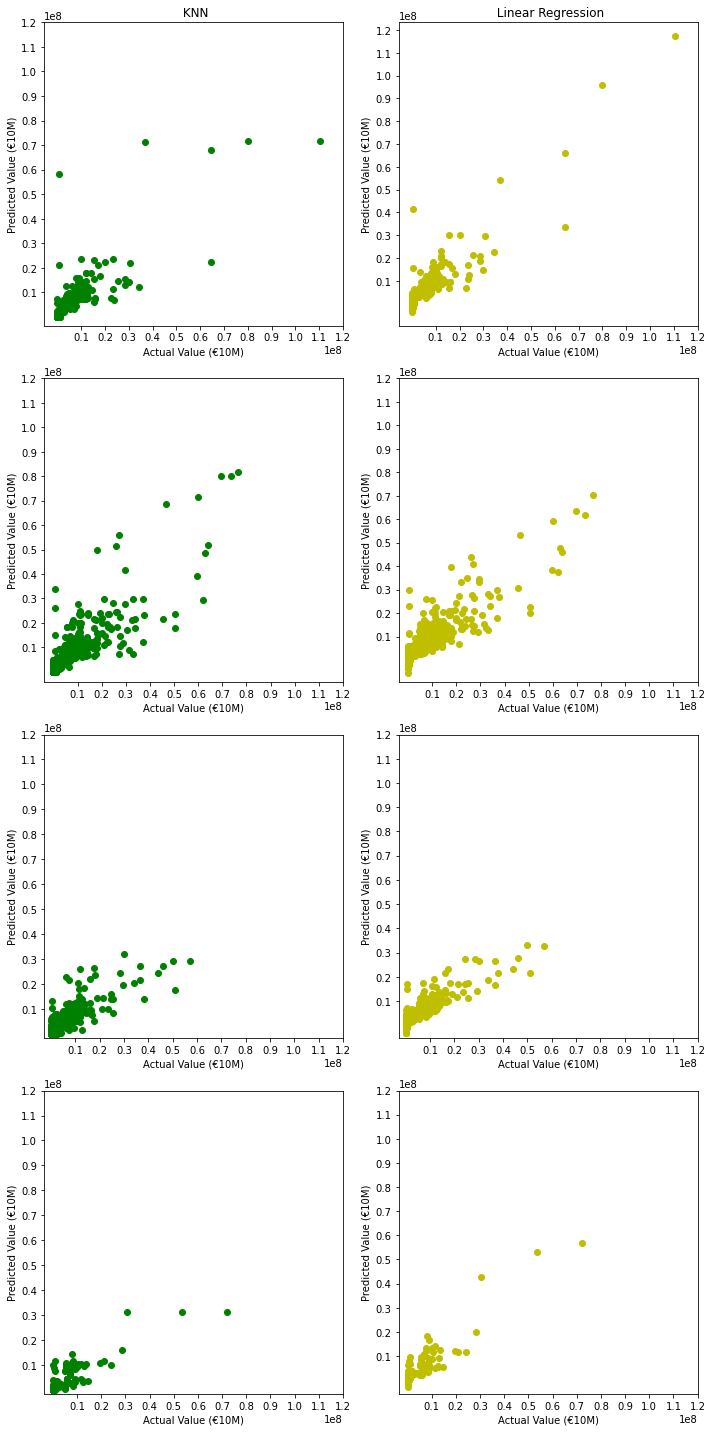

In [34]:
import matplotlib.ticker as ticker
#Creating figure with 4 rows and 2 columns.
#Results of KNN will be plotted in left side and LR results will be plotted in right side.
fig, ax = plt.subplots(4,2,figsize = (10,20))

#Clustering 
def cluster(dataframe,category,v,h):
    #Setting colour for first column to green and second column to yellow.
    if h == 0:
        col = 'g'
    elif h == 1:
        col = 'y'
        
    #Adding histogram of data sent to function.
    ax[v][h].scatter(dataframe['Actual Value'], dataframe['Predicted Value'], color = col)
    ax[v][h].set_xlabel('Actual Value (€10M)')
    ax[v][h].set_ylabel('Predicted Value (€10M)')
    ax[0][h].set_title(' ' + category)
    ax[v][h].set_xticks(np.arange(10000000,130000000,10000000))
    ax[v][h].set_yticks(np.arange(10000000,130000000,10000000))
    fig.tight_layout()

#Creating plots for KNN results
cluster(fwd_prices_knn,'KNN',0,0)
cluster(mid_prices_knn,'',1,0)
cluster(def_prices_knn,'',2,0)
cluster(gk_prices_knn,'KNN',3,0)

#Creating plots for Linear Regression results
cluster(fwd_prices_lr,'Linear Regression',0,1)
cluster(mid_prices_lr,'',1,1)
cluster(def_prices_lr,'',2,1)
cluster(gk_prices_lr,'Linear Regression',3,1)

In [35]:
fwd_x_train, fwd_x_test, fwd_y_train, fwd_y_test = train_test_split(fwd_x, fwd_y, test_size = 0.2, random_state = 1)
mid_x_train, mid_x_test, mid_y_train, mid_y_test = train_test_split(mid_x, mid_y, test_size = 0.2, random_state = 1)
def_x_train, def_x_test, def_y_train, def_y_test = train_test_split(def_x, def_y, test_size = 0.2, random_state = 1)
gk_x_train, gk_x_test, gk_y_train, gk_y_test = train_test_split(gk_x, gk_y, test_size = 0.2, random_state = 1)

In [36]:
fwd_neighbours = knn_neighbors(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards')
mid_neighbours = knn_neighbors(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders')
def_neighbours = knn_neighbors(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders')
gk_neighbours  = knn_neighbors(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers') 

D:\Users\windo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
D:\Users\windo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
D:\Users\windo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
D:\Users\windo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [37]:
print("The best results were obtained by using the following number of neighbors for each dataset:")
for i, j in [(fwd_neighbours, 'forwards'), (mid_neighbours, 'midfielders'), (def_neighbours, 'defenders'), (gk_neighbours, 'goalkeepers')]:print(j + ": " + str(i))

The best results were obtained by using the following number of neighbors for each dataset:
forwards: 3
midfielders: 5
defenders: 4
goalkeepers: 3


In [38]:
fwd_neighbours = 3
mid_neighbours = 5
def_neighbours = 4
gk_neighbours  = 3

In [39]:
fwd_prices_knn = knn_predict(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards', fwd_neighbours)
mid_prices_knn = knn_predict(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders', mid_neighbours)
def_prices_knn = knn_predict(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders', def_neighbours)
gk_prices_knn = knn_predict(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers', gk_neighbours) 

knn_prices = [fwd_prices_knn, mid_prices_knn, def_prices_knn, gk_prices_knn]

The accuracy for forwards is: 80.36 %
The accuracy for midfielders is: 76.52 %
The accuracy for defenders is: 79.64 %
The accuracy for goalkeepers is: 75.12 %


In [40]:
fwd_prices_lr = lr_predict(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards')
mid_prices_lr = lr_predict(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders')
def_prices_lr = lr_predict(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders')
gk_prices_lr = lr_predict(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers') 

lr_prices = [fwd_prices_lr, mid_prices_lr, def_prices_lr, gk_prices_lr]

The R2 value for forwards is: 84.81 %
The R2 value for midfielders is: 78.82 %
The R2 value for defenders is: 79.05 %
The R2 value for goalkeepers is: 87.79 %


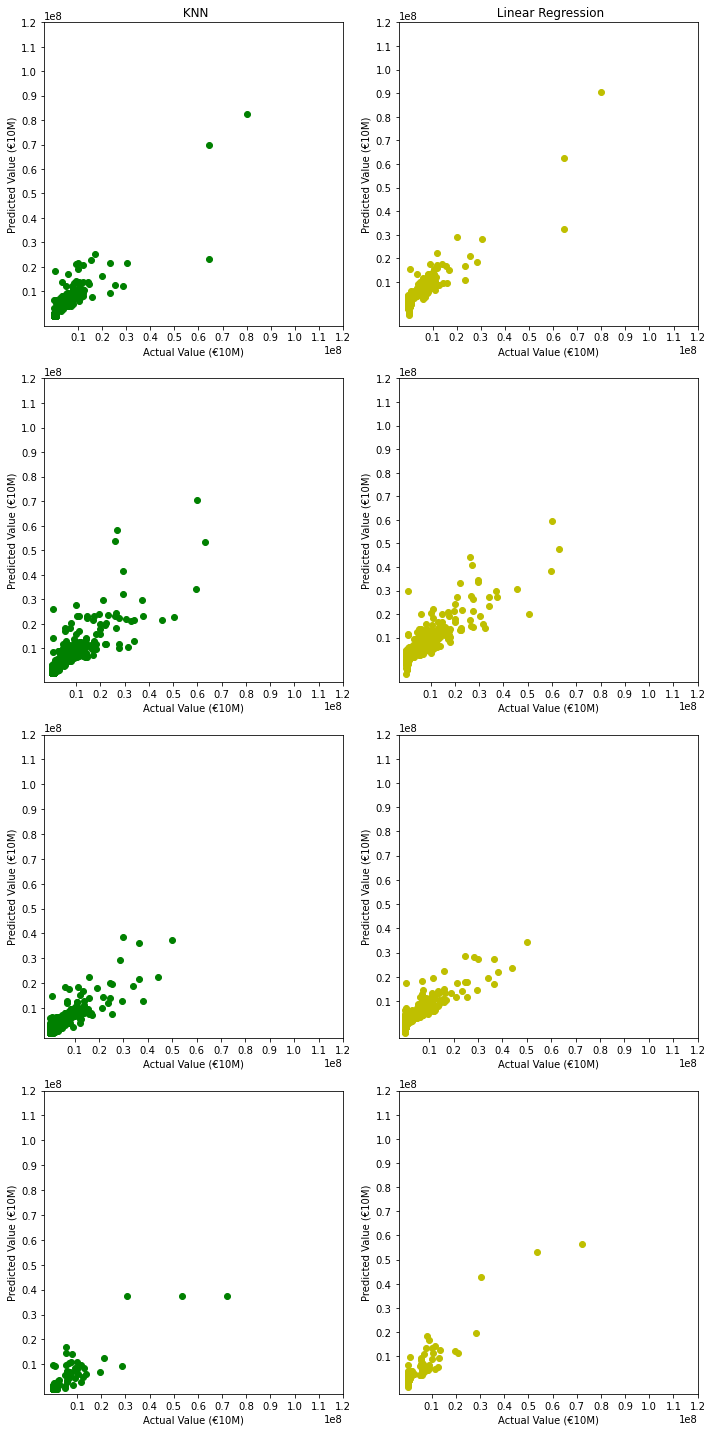

In [41]:
fig, ax = plt.subplots(4,2,figsize = (10,20))

cluster(fwd_prices_knn,'KNN',0,0)
cluster(mid_prices_knn,'',1,0)
cluster(def_prices_knn,'',2,0)
cluster(gk_prices_knn,'KNN',3,0)

#Creating plots for Linear Regression results
cluster(fwd_prices_lr,'Linear Regression',0,1)
cluster(mid_prices_lr,'',1,1)
cluster(def_prices_lr,'',2,1)
cluster(gk_prices_lr,'Linear Regression',3,1)

In [42]:
fwd_x_train, fwd_x_test, fwd_y_train, fwd_y_test = train_test_split(fwd_x, fwd_y, test_size = 0.1, random_state = 1)
mid_x_train, mid_x_test, mid_y_train, mid_y_test = train_test_split(mid_x, mid_y, test_size = 0.1, random_state = 1)
def_x_train, def_x_test, def_y_train, def_y_test = train_test_split(def_x, def_y, test_size = 0.1, random_state = 1)
gk_x_train, gk_x_test, gk_y_train, gk_y_test = train_test_split(gk_x, gk_y, test_size = 0.1, random_state = 1)

In [43]:
print("The best results were obtained by using the following number of neighbors for each dataset:")
for i, j in [(fwd_neighbours, 'forwards'), (mid_neighbours, 'midfielders'), (def_neighbours, 'defenders'), (gk_neighbours, 'goalkeepers')]:print(j + ": " + str(i))

The best results were obtained by using the following number of neighbors for each dataset:
forwards: 3
midfielders: 5
defenders: 4
goalkeepers: 3


In [44]:
fwd_neighbours = 3
mid_neighbours = 5
def_neighbours = 4
gk_neighbours  = 3

In [45]:
fwd_prices_knn = knn_predict(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards', fwd_neighbours)
mid_prices_knn = knn_predict(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders', mid_neighbours)
def_prices_knn = knn_predict(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders', def_neighbours)
gk_prices_knn = knn_predict(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers', gk_neighbours) 

knn_prices = [fwd_prices_knn, mid_prices_knn, def_prices_knn, gk_prices_knn]

The accuracy for forwards is: 81.41 %
The accuracy for midfielders is: 72.85 %
The accuracy for defenders is: 78.99 %
The accuracy for goalkeepers is: 54.05 %


In [46]:
fwd_prices_lr = lr_predict(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards')
mid_prices_lr = lr_predict(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders')
def_prices_lr = lr_predict(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders')
gk_prices_lr = lr_predict(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers') 

lr_prices = [fwd_prices_lr, mid_prices_lr, def_prices_lr, gk_prices_lr]

The R2 value for forwards is: 84.18 %
The R2 value for midfielders is: 76.17 %
The R2 value for defenders is: 82.59 %
The R2 value for goalkeepers is: 67.57 %


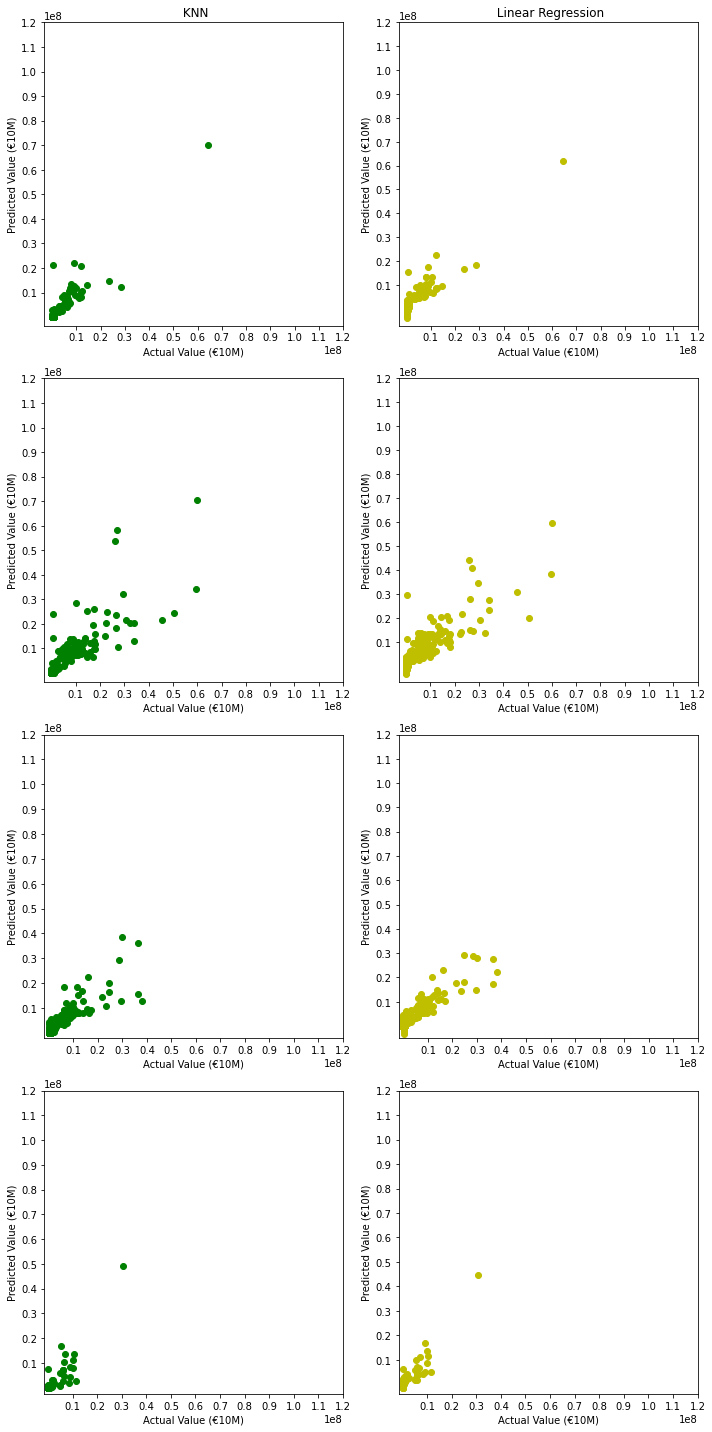

In [47]:
fig, ax = plt.subplots(4,2,figsize = (10,20))

cluster(fwd_prices_knn,'KNN',0,0)
cluster(mid_prices_knn,'',1,0)
cluster(def_prices_knn,'',2,0)
cluster(gk_prices_knn,'KNN',3,0)

#Creating plots for Linear Regression results
cluster(fwd_prices_lr,'Linear Regression',0,1)
cluster(mid_prices_lr,'',1,1)
cluster(def_prices_lr,'',2,1)
cluster(gk_prices_lr,'Linear Regression',3,1)

In [48]:
fwd_x_train, fwd_x_test, fwd_y_train, fwd_y_test = train_test_split(fwd_x, fwd_y, test_size = 0.4, random_state = 1)
mid_x_train, mid_x_test, mid_y_train, mid_y_test = train_test_split(mid_x, mid_y, test_size = 0.4, random_state = 1)
def_x_train, def_x_test, def_y_train, def_y_test = train_test_split(def_x, def_y, test_size = 0.4, random_state = 1)
gk_x_train, gk_x_test, gk_y_train, gk_y_test = train_test_split(gk_x, gk_y, test_size = 0.4, random_state = 1)

In [49]:
print("The best results were obtained by using the following number of neighbors for each dataset:")
for i, j in [(fwd_neighbours, 'forwards'), (mid_neighbours, 'midfielders'), (def_neighbours, 'defenders'), (gk_neighbours, 'goalkeepers')]:print(j + ": " + str(i))

The best results were obtained by using the following number of neighbors for each dataset:
forwards: 3
midfielders: 5
defenders: 4
goalkeepers: 3


In [50]:
fwd_prices_knn = knn_predict(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards', fwd_neighbours)
mid_prices_knn = knn_predict(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders', mid_neighbours)
def_prices_knn = knn_predict(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders', def_neighbours)
gk_prices_knn = knn_predict(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers', gk_neighbours) 

knn_prices = [fwd_prices_knn, mid_prices_knn, def_prices_knn, gk_prices_knn]

The accuracy for forwards is: 74.72 %
The accuracy for midfielders is: 76.87 %
The accuracy for defenders is: 75.42 %
The accuracy for goalkeepers is: 68.51 %


In [51]:
fwd_prices_lr = lr_predict(fwd_x_train, fwd_y_train, fwd_x_test, fwd_y_test, fwd_features, 'forwards')
mid_prices_lr = lr_predict(mid_x_train, mid_y_train, mid_x_test, mid_y_test, mid_features, 'midfielders')
def_prices_lr = lr_predict(def_x_train, def_y_train, def_x_test, def_y_test, def_features, 'defenders')
gk_prices_lr = lr_predict(gk_x_train, gk_y_train, gk_x_test, gk_y_test, gk_features, 'goalkeepers') 

lr_prices = [fwd_prices_lr, mid_prices_lr, def_prices_lr, gk_prices_lr]

The R2 value for forwards is: 84.72 %
The R2 value for midfielders is: 79.17 %
The R2 value for defenders is: 77.98 %
The R2 value for goalkeepers is: 79.06 %


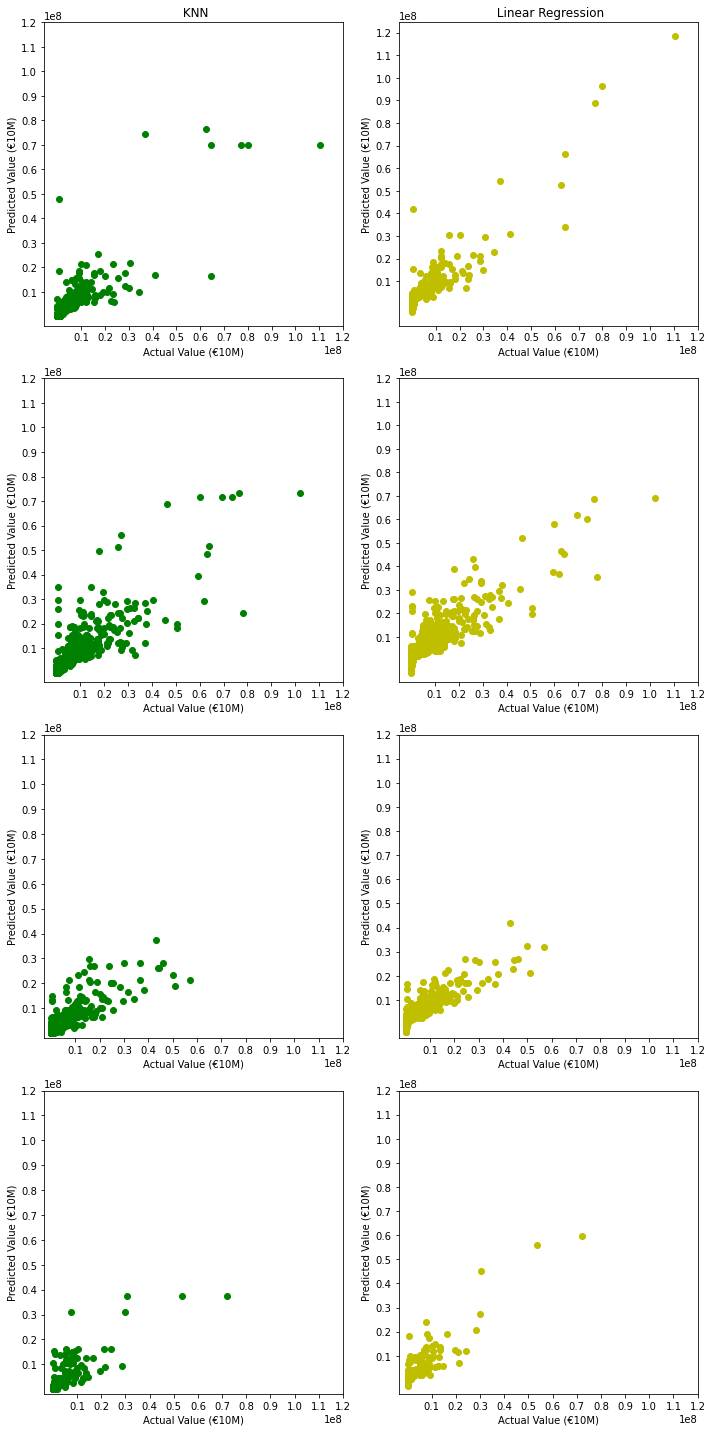

In [52]:
fig, ax = plt.subplots(4,2,figsize = (10,20))

cluster(fwd_prices_knn,'KNN',0,0)
cluster(mid_prices_knn,'',1,0)
cluster(def_prices_knn,'',2,0)
cluster(gk_prices_knn,'KNN',3,0)

#Creating plots for Linear Regression results
cluster(fwd_prices_lr,'Linear Regression',0,1)
cluster(mid_prices_lr,'',1,1)
cluster(def_prices_lr,'',2,1)
cluster(gk_prices_lr,'Linear Regression',3,1)